##  Naive Bayes - Padmaja 19BAI1107 

**Importing libraries**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The data

**Reading the csv file heart_decision_tree( dataset taken from kaggle : Heart Disease UCI )**

This is a heart disease classification datset. It has 14 attributes. The target attribute tells us if a person has a heart condition. 0 refers to no heartcondition where as 1 refers to presence of heart disease.

In [2]:
df1 = pd.read_csv('heart decision tree.csv')

In [3]:
df1.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
df1.shape

(303, 14)

**Inference : This dataset has 303 rows and 14 columns**

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Exploratory Data Analysis

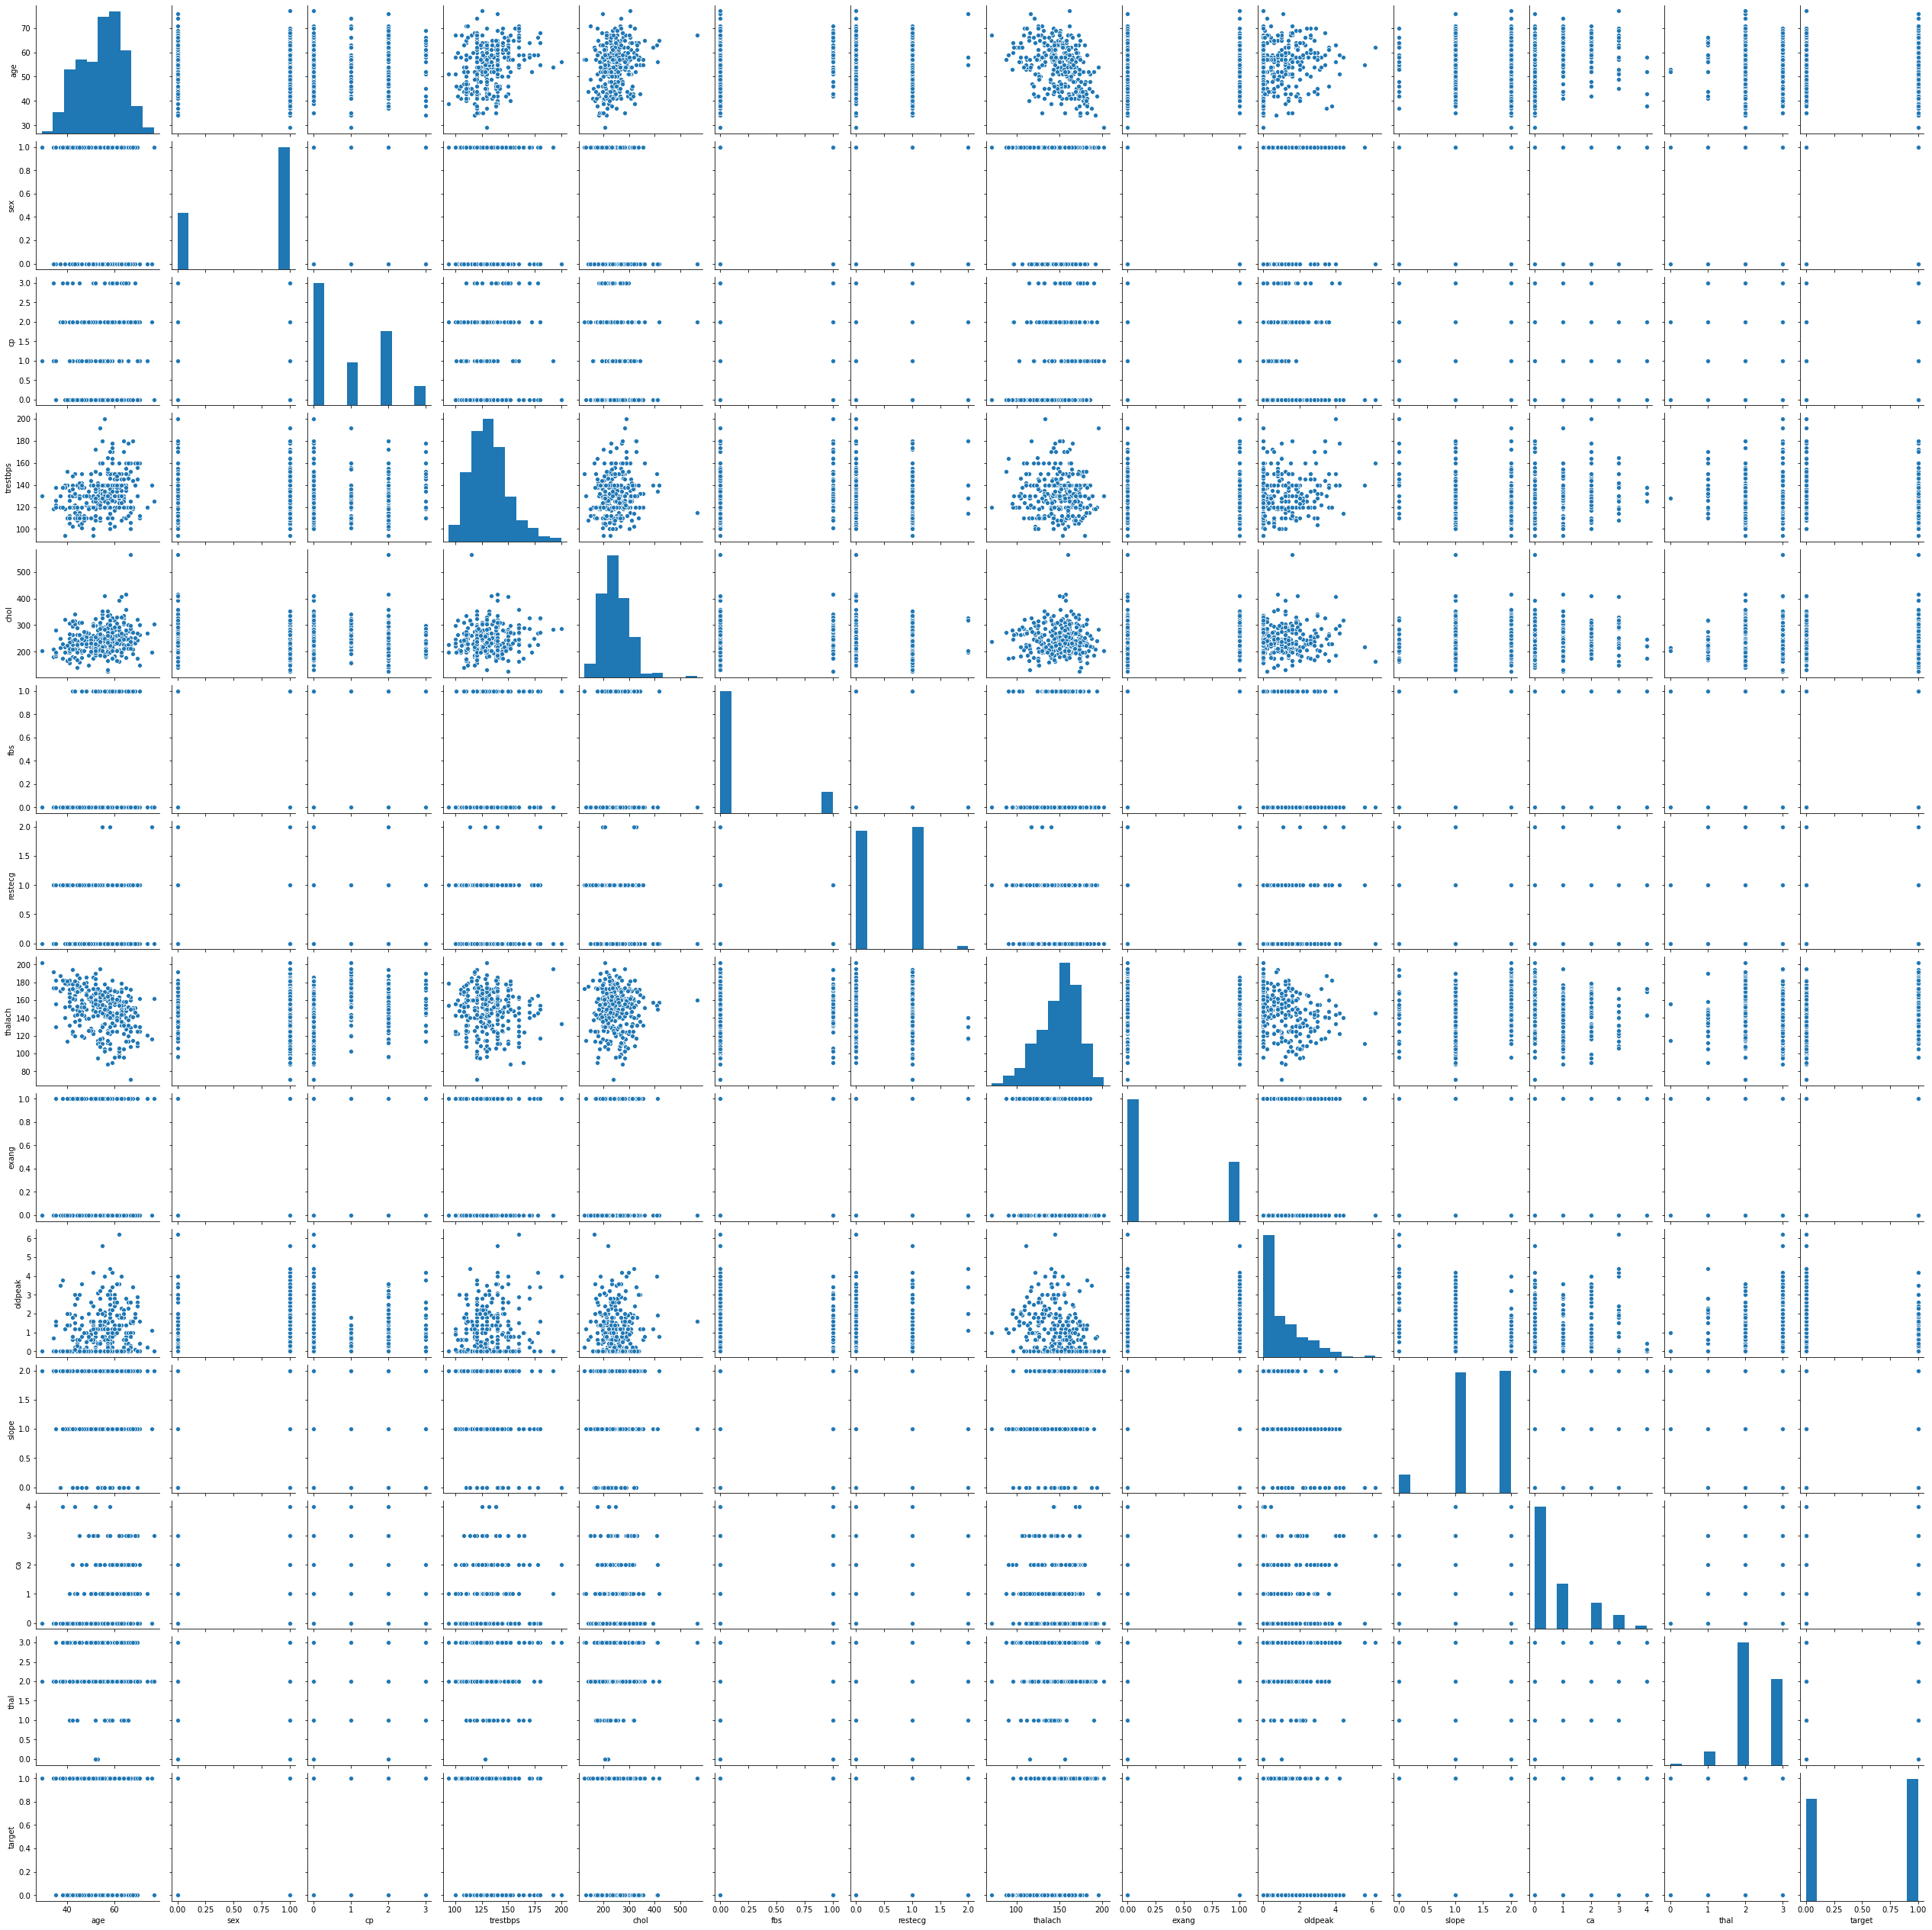

In [6]:
sns.pairplot(df1)

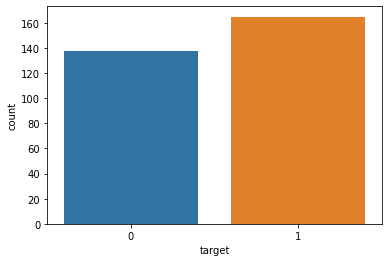

In [32]:
sns.countplot(x='target',data=df1)

**Inference : This plot gives us a count of the (0)- no of people without heart disease and (1)- no of people with heart disease. In this dataset about 130 peoplr do not have heart disease and 160 people are diagnosed with a heart disease** 

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('target',axis=1), 
                                                    df1['target'], test_size=0.30, 
                                                    random_state=101)

# GaussianNB

In [18]:
from sklearn.naive_bayes import GaussianNB

In [20]:
naivebayes = GaussianNB()

In [21]:
naivebayes.fit(X_train,y_train)

GaussianNB()

# Prediction and evaluation

In [22]:
predictions = naivebayes.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        44
           1       0.83      0.85      0.84        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



**Inference : From the above classification report we can check presicion, recall and f1 score.This model has a precision od 0.84 for not diseased and 0.83 for diseased.The accuracy of this model is about 84%.**

In [25]:
print(confusion_matrix(y_test,predictions))

[[36  8]
 [ 7 40]]


**Inference : From the confusion matrix we can observe that out of the total of 91 predictions the model has given correct predictions 76(36+40) times and wrong predictions 15 times(8+7).**

# MultinomialNB

In [27]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

# Prediction and evaluation

In [30]:
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        44
           1       0.80      0.85      0.82        47

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



**Inference : From the above classification report we can check presicion, recall and f1 score.This model has a precision od 0.83 for not diseased and 0.80 for diseased.The accuracy of this model is about 81%.**

In [31]:
print(confusion_matrix(y_test,predictions))

[[34 10]
 [ 7 40]]


**Inference : From the confusion matrix we can observe that out of the total of 91 predictions the model has given correct predictions 74(34+40) times and wrong predictions 17 times(10+7).**